In [15]:
#################################################################
# Ejemplo de creación de un Sistema generador de partículas aleatorias
# que se lanzan en tiro parabólico con rebote
# Universidad Militar Nueva Granada
# Ingeniería en Multimedia Campus
# Simulación 2021-02
# Ing. Eduard Sierra
#################################################################
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy import sin, cos, pi, outer, ones, size, linspace
import numpy as np
from PIL import Image
import random

In [16]:
class Vector3D:
    def __init__(self,x,y,z):
        self.x=x
        self.y=y
        self.z=z
        
    def __add__(self,v):
        return Vector3D (self.x+v.x,self.y+v.y,self.z+v.z)
    
    def __sub__(self,v):
        return Vector3D (self.x-v.x,self.y-v.y,self.z-v.z)
    
    def __mul__(self,s):
        return Vector3D (self.x*s,self.y*s,self.z*s)
    
    def __truediv__(self,s):
        return Vector3D (self.x/s,self.y/s,self.z/s)
    
    def __str__(self):
        return '(%f, %f, %f)' % (self.x, self.y, self.z)

In [17]:
a=Vector3D(3,2,1)
b=Vector3D(1,2,3)
c=Vector3D(0,0,0)
print(c)
c=a+b
b=a-a
a=a*3
#c.x=a.x+b.x
#c.y=a.y+b.y
#c.z=a.z+b.z

print(a.x,a.y,a.z)
print(b.x,b.y,b.z)
print(c.x,c.y,c.z)


(0.000000, 0.000000, 0.000000)
9 6 3
0 0 0
4 4 4


In [18]:
class Particula:
    def __init__(self):
        self.p=Vector3D(0,0,0)
        self.v=Vector3D(0,0,0)
        self.f=Vector3D(0,0,0)
        self.m=0
        self.color=(0,0,0)
        self.tam=1
    
    def cambiarPosicion(self,pos):
        self.p=pos
        
    def cambiarVelocidad(self,vel):
        self.v=vel
        
    def cambiarFuerza(self,fuerza):
        self.f=fuerza
        
    def cambiarMasa(self,masa):
        self.f=m
    def cambiarTamanio(self,tam):
        self.tam=tam
    def cambiarColor(self,color):
        self.color=color
    
    def __str__(self):
        return 'Posicion \t%s \nVelocidad \t%s \n' % (self.p,self.v)
    
    def __repr__(self):
        return 'Posicion \t%s \nVelocidad \t%s \n' % (self.p,self.v)

    def gParticula(self):
        #Generación de puntos de geometria paramétrica de una esfera
        #el centro está dado por 
        #el tamaño del radio se tomará r=self.tam
        #por razones de visualización para evitar deformación 
        #con esta perspectiva se ve mas circular
        #en tmaños de despliegue mayores a 100
        #se cambio la ecuación parametrica
        # debia ser yc = self.p.y+r * outer(sin(a), sin(b))
        r=self.tam
        a = linspace(0, 2*pi,int(r*5))
        b = linspace(0, pi,int(r*5))
        xc = self.p.x+r * outer(cos(a), sin(b))
        yc = self.p.y+0.3*r * outer(sin(a), sin(b))
        zc = self.p.z+r * outer(ones(size(a)), cos(b))
        return xc,yc,zc
    

Posicion 	(1.000000, 2.000000, 3.000000) 
Velocidad 	(0.000000, 0.000000, 0.000000) 

Posicion 	(1.000000, 2.000000, 30.000000) 
Velocidad 	(0.000000, 0.000000, 0.000000) 



(-100.0, 100.0)

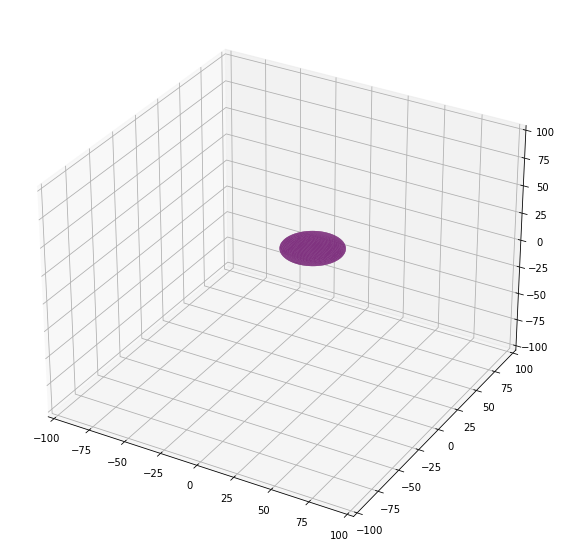

In [19]:
from matplotlib.colors import LightSource, Normalize
from matplotlib.colors import LinearSegmentedColormap
part=Particula()
p=Vector3D(1,2,3)
part.cambiarPosicion(p)
part.cambiarTamanio(20)

rgb=(0.5,0.2,0.5)
part.cambiarColor(rgb)
print(part)
part.p=Vector3D(1,2,30)
print(part)
x,y,z = part.gParticula()
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(x, z, y, color=part.color, shade=False)
#ax.scatter(part.p.x, part.p.z, part.p.y, color=('b'))

#ax.scatter(part.p.x, part.p.z, part.p.y, color=rgb)
ax.set_xlim(-100,100)
ax.set_ylim(-100,100)
ax.set_zlim(-100,100)


In [20]:
class SistemaParticulasAleatorias:
    def __init__(self,n):
        self.particulas=[]
        self.n=n
        self.t=0
        self.gravedad=-9.8
        self.kRestitucion=0.8
        self.paso=0.1
        self.m=random.randrange(1,1000)
        for i in range(0,int(n)): #en C o java for(i=0;i<n;i++)
            paux=Particula()
            self.particulas.append(paux)
        #print(self.particulas)
    
    def CambiarVelocidad(self):
        for i in range(1000):

            if(i>0 & i<101):
                part.cambiarPosicion(Vector3D(100,100,100))
                kRestitucion = 0.9
            if(i>100 & i<401):
                part.cambiarPosicion(Vector3D(0,0,0))
                part.cambiarVelocidad(Vector3D(random.randrange(-200,200),random.randrange(0,1000),random.randrange(-200,200)))
                self.v=(2*part.cambiarvelocidad * 2 * math.sin(i)*math.cos(i)/gravedad)
                kRestitucion=random.randrange(0,1)
            if(i>400 & i<701):
                part.cambiarPosicion(Vector3D(100,0,100))
                part.cambiarVelocidad(Vector3D(random.randrange(-200,200),random.randrange(0,100),random.randrange(-200,200)))
                self.v=(2*part.cambiarvelocidad * 2 * math.sin(i)*math.cos(i)/gravedad)
                kRestitucion=0.5
            if(i>700 & i<=1000):
                part.cambiarPosicion(Vector3D(0,0,100))
                part.cambiarVelocidad(Vector3D(random.randrange(0,200),random.randrange(0,100),random.randrange(0,200)))
                self.v=(2*part.cambiarvelocidad * 2 * math.sin(i)*math.cos(i)/gravedad)
                kRestitucion=0.5
    
    #Modificar condiciones iniciales aqui.
    def CreacionAleatoria(self):
        for part in self.particulas:
            #random.randint(-10,10) funcion random
            
            #Posicion inicial aleatroai saleido de y=0, en el espacio de x en (0,50) y z en (0,50)
            part.cambiarPosicion(Vector3D(20,0,20))
            
            #Cinco tamaños diferentes
            t=random.randint(1,10)
            part.cambiarTamanio(t)
            
            #colores
            color=(random.random(),random.random(),random.random())#Usa random apra genrar valores entre 0 y 1 para los valores de rgb
            part.cambiarColor(color)
            
            #Velocidades iniciales hacia 4 direcciones diferentes
            r=random.randint(0,3)
            if(r==0):
                part.cambiarVelocidad(Vector3D(random.randint(0,100),random.randint(0,200),random.randint(0,0)))
            if(r==1):
                part.cambiarVelocidad(Vector3D(-random.randint(0,100),random.randint(0,200),random.randint(0,0)))
            if(r==2):
                part.cambiarVelocidad(Vector3D(random.randint(0,0),random.randint(0,200),random.randint(0,100)))
            if(r==3):
                part.cambiarVelocidad(Vector3D(random.randint(0,0),random.randint(0,200),-random.randint(0,100)))
            part.m=1
        #print(self.particulas)
    
    def PasoSimulacion(self,n):
        
        #################################################
        #Aplicar fuerzas y actualizar estado de fase usando método de Euler
        #################################################
                 
        for part in self.particulas:
            #Actualizar posición
            part.p=part.p+self.dp(self.t,part.p,part.v)*self.paso            
            #Actualizar velocidad
            part.v=part.v+self.dv(self.t,part.p,part.v,part.m)*self.paso 
            
            #Verifica colisión con el piso
            #Ecuación del plano Ax+By+Cz+D=0 para el suelo 0x+1y+0z+0=0 => y=0
            #Vector normal (A,B,C)==>(0,1,0) 
            #Evalúa ecuación del plano con los valores de las coordenadas del punto
            #El punto esté en el plano si al evaluar la ecuación esta da
            y=part.p.y#evalua la ecuación
            #verifica colision si el signo es menor entre el producto punto (X-P)N 
            #Hay colision exacta cuando este prducto es igual a cero
            #(X posición de la particula)             
            #(P posición de un punto en el plano, N, normal del plano)             
            if(y<=0):#Con la desigualdad verifica el signo, con la igualdad el contacto exacto            
                part.v.y=-self.kRestitucion*part.v.y #Cambia la dirección de la velocidad, para cambiar la dirección de movimiento en el eje y
            
        #Actualizar tiempo
        self.t=self.t+paso
        self.Graficar(n)
        
    def Rungekutta4(x0,y0,xf,h):
        tam=((xf-xi)/h)+1
        x=np.zeros(int(tam))
        y=np.zeros(int(tam))
        x[0]=x0
        y[0]=y0
        for i in range(int(tam)-1):

            k1=diferencial(x[i],y[i])
            k2=diferencial(x[i]+h/2, y[i]+(h/2)*k1)
            k3=diferencial(x[i]+h/2, y[i]+(h/2)*k2)
            k4=diferencial(x[i]+h/2,y[i]+h*k3)
            y[i+1]=y[i]+(h/6)*(k1+2*k2+2*k3+k4)
            x[i+1]=x[i]+h
            print(x)
            print(y)
        return x,y        
    
    def Simular(self, duracion,paso):
        self.paso=paso
        frames = int(((duracion)/paso)+1)
        self.t=0;
        self.Graficar(0)#Grafica t=0
        print('Cuadro '+str(0)+' Finalizado')
        for n in range(1,frames):
            self.PasoSimulacion(n)
            print('Cuadro '+str(n)+' Finalizado')
            
        
        
        
        images = [Image.open(f"Secuencia/SPA{n}.png") for n in range(frames)]
        images[0].save('Secuencia/SPAFinal.gif', save_all=True, append_images=images[1:], duration=100, loop=0)
        print('Terminé')
                
    def Graficar(self,n):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1,1, projection='3d')            
        
        #Ciclo para graficar todas las particulas
        for part in self.particulas:
        #for part in range(2):
            #1. Grafica con esferas de diferentes tamañosprint(part.tam)
            #genera la geometría de la particula como una esfera
            x,y,z = part.gParticula()
            #Grafica la esfera de la particula como una superficie 
            #con shade=False, queda de color plano sin sombra
            ax.plot_surface(x, z, y, color=part.color, shade=True)
            
            #2. Activar para graficar con puntos
            #ax.scatter(part.p.x, part.p.z, part.p.y, color=part.color)#grafica como puntos
    
        ax.set_xlim(-250,250)
        ax.set_ylim(-250,250)
        ax.set_zlim(0,200)
        plt.title("t = "+str(round(self.t,2)))
        plt.savefig(f"Secuencia/SPA{n}.png")
        #plt.show()
        plt.close()
        
    def fuerzagravedad(self,m):
        return (Vector3D(0,m*self.gravedad,0))
    
    def fuerza(self,t,p,v,m):
        ftotal=self.fuerzagravedad(m)#sumatoria de fuerzas
        return ftotal
        
    def dv(self,t,p,v,m) :
        return self.fuerza(t,p,v,m)/float(m)
    
    def dp(self,t,p,v) :        
        return v
        
    
        

In [21]:
S=SistemaParticulasAleatorias(1000)
S.CreacionAleatoria()
duracion=5
paso=0.5
S.Simular(duracion,paso)


Cuadro 0 Finalizado
Cuadro 1 Finalizado
Cuadro 2 Finalizado
Cuadro 3 Finalizado
Cuadro 4 Finalizado
Cuadro 5 Finalizado
Cuadro 6 Finalizado
Cuadro 7 Finalizado
Cuadro 8 Finalizado
Cuadro 9 Finalizado
Cuadro 10 Finalizado
Terminé
